# Sleepdata Data Analysis

# Data Cleaning and Preparation

In this notebook, I will clean and prepare the sleep data for analysis. The following steps will be performed:
1. Handling missing values
2. Converting 'Start' and 'End' columns to datetime format
3. Calculating the duration of sleep


In [42]:
import pandas as pd

# Load the dataset
sleep_data = pd.read_csv("sleepdata.csv")
sleep_data.head(10)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,12/29/2014 22:57,12/30/2014 7:30,100%,8:32,:),NaN,59.0,0
1,12/30/2014 21:17,12/30/2014 21:33,3%,0:16,:|,Stressful day,72.0,0
2,12/30/2014 22:42,12/31/2014 7:13,98%,8:30,:|,NaN,57.0,0
3,12/31/2014 22:31,1/1/2015 6:03,65%,7:32,NaN,NaN,NaN,0
4,1/1/2015 22:12,1/2/2015 4:56,72%,6:44,:),Drank coffee:Drank tea,68.0,0
5,1/3/2015 0:34,1/3/2015 7:47,83%,7:12,:),Drank coffee:Drank tea,60.0,0
6,1/4/2015 0:23,1/4/2015 7:37,78%,7:14,NaN,Drank tea,NaN,0
7,1/4/2015 21:34,1/5/2015 4:53,78%,7:18,:),Ate late:Drank coffee,57.0,0
8,1/5/2015 21:32,1/6/2015 5:00,69%,7:27,:),Drank coffee:Drank tea:Worked out,56.0,0
9,1/6/2015 21:24,1/7/2015 5:00,74%,7:35,:|,Drank tea:Worked out,64.0,0


## Step 1: Handling Missing Values

I will fill the missing values in the 'Heart rate' column with the mean heart rate and replace missing values in the 'Wake up' column with 'Unknown'.


In [43]:
# Handling missing values
sleep_data['Heart rate'].fillna(sleep_data['Heart rate'].mean(), inplace=True)
sleep_data['Wake up'].fillna('Unknown', inplace=True)

## Step 2: Converting 'Start' and 'End' Columns to Datetime Format

I will convert the 'Start' and 'End' columns to datetime format.


In [44]:
# Convert 'Start' and 'End' Columns to datetime
sleep_data['Start'] = pd.to_datetime(sleep_data['Start'])
sleep_data['End'] = pd.to_datetime(sleep_data['End'])

## Step 3: Calculating Duration

I will calculate the duration of sleep in hours by subtracting 'Start' from 'End'.

In [45]:
# Calculate the duration of sleep
sleep_data['Duration'] = (sleep_data['End'] - sleep_data['Start']).dt.total_seconds() / 3600.0

# Display the cleaned and prepared dataset
sleep_data.head(10)

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Duration
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100%,8:32,:),NaN,59.000000,0,8.550000
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3%,0:16,:|,Stressful day,72.000000,0,0.266667
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98%,8:30,:|,NaN,57.000000,0,8.516667
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65%,7:32,Unknown,NaN,62.310345,0,7.533333
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72%,6:44,:),Drank coffee:Drank tea,68.000000,0,6.733333
5,2015-01-03 00:34:00,2015-01-03 07:47:00,83%,7:12,:),Drank coffee:Drank tea,60.000000,0,7.216667
6,2015-01-04 00:23:00,2015-01-04 07:37:00,78%,7:14,Unknown,Drank tea,62.310345,0,7.233333
7,2015-01-04 21:34:00,2015-01-05 04:53:00,78%,7:18,:),Ate late:Drank coffee,57.000000,0,7.316667
8,2015-01-05 21:32:00,2015-01-06 05:00:00,69%,7:27,:),Drank coffee:Drank tea:Worked out,56.000000,0,7.466667
9,2015-01-06 21:24:00,2015-01-07 05:00:00,74%,7:35,:|,Drank tea:Worked out,64.000000,0,7.600000


## 1. Descriptive Statistics

I will begin by examining the basic characteristics of the dataset through descriptive statistics. This includes calculating measures such as mean, median, and standard deviation for numerical columns like 'Sleep quality', 'Time in bed', 'Heart rate', 'Activity (steps)', and 'Duration'. Additionally, I will look at the frequency distributions for categorical columns like 'Wake up' and 'Sleep Notes'.

In [46]:
# Descriptive statistics for numerical columns
sleep_data.describe()

,Heart rate,Activity (steps),Duration
count,31.000000,31.0,31.000000
mean,62.310345,0.0,7.405376
std,7.750714,0.0,1.919526
min,53.000000,0.0,0.266667
25%,57.500000,0.0,7.233333
50%,60.000000,0.0,7.600000
75%,65.000000,0.0,8.116667
max,94.000000,0.0,9.333333


In [47]:
# Frequency distribution for 'Wake up'
sleep_data['Wake up'].value_counts()

:)         21
:|          8
Unknown     2
Name: Wake up, dtype: int64

In [48]:
# Frequency distribution for 'Sleep Notes'
sleep_data['Sleep Notes'].value_counts()

Drank coffee:Drank tea                  8
Drank coffee:Drank tea:Worked out       6
Drank coffee:Drank tea:Stressful day    4
Drank tea                               3
Drank tea:Worked out                    2
Drank coffee                            2
Stressful day                           1
Ate late:Drank coffee                   1
Name: Sleep Notes, dtype: int64

## 2. Correlation Analysis

I will calculate the correlation matrix to understand the relationships between various numerical variables such as 'Sleep quality', 'Heart rate', 'Duration', and 'Activity (steps)'. This will help me identify any strong positive or negative correlations.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11200\3942753811.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sleep_data[['Sleep quality', 'Heart rate', 'Duration', 'Activity (steps)']].corr()


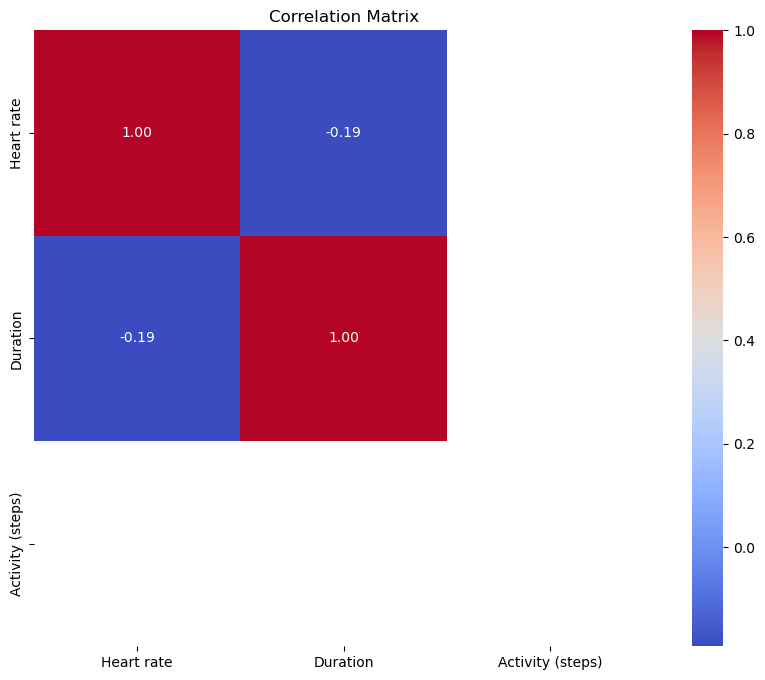

In [49]:
import seaborn as sns

# Correlation matrix
corr_matrix = sleep_data[['Sleep quality', 'Heart rate', 'Duration', 'Activity (steps)']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 3. Heart Rate Analysis

I will explore the relationship between heart rate and sleep quality, as well as heart rate and sleep duration. This will help us understand if there is any significant impact of heart rate on sleep metrics.

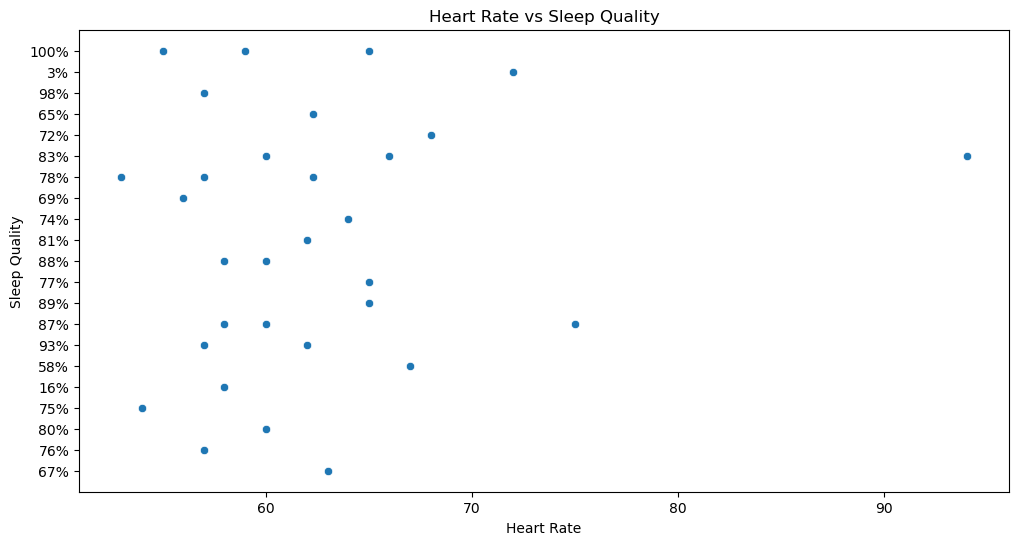

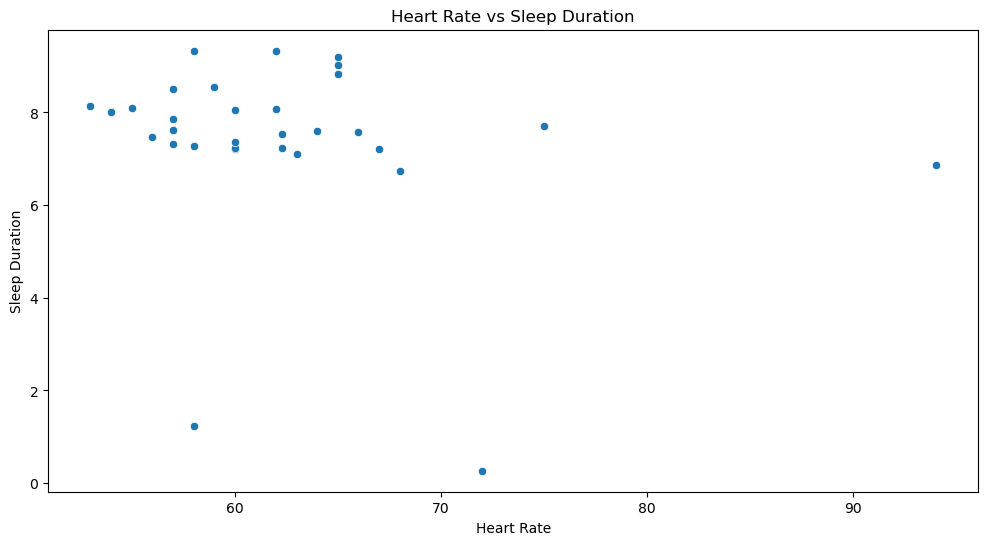

In [50]:
# Plotting heart rate vs sleep quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sleep_data, x='Heart rate', y='Sleep quality')
plt.title('Heart Rate vs Sleep Quality')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Quality')
plt.show()

# Plotting heart rate vs sleep duration
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sleep_data, x='Heart rate', y='Duration')
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Duration')
plt.show()

## 4. Wake-up Mood Analysis

I will analyze how the mood upon waking up relates to sleep quality and duration. By grouping the data by different wake-up moods, we can compare the average sleep quality and duration associated with each mood.

Index(['Start', 'End', 'Sleep quality', 'Time in bed', 'Wake up',
       'Sleep Notes', 'Heart rate', 'Activity (steps)', 'Duration'],
      dtype='object')
   Wake up  Sleep quality  Duration
0       :)       0.801905  7.472222
1       :|       0.723750  7.235417
2  Unknown       0.715000  7.383333


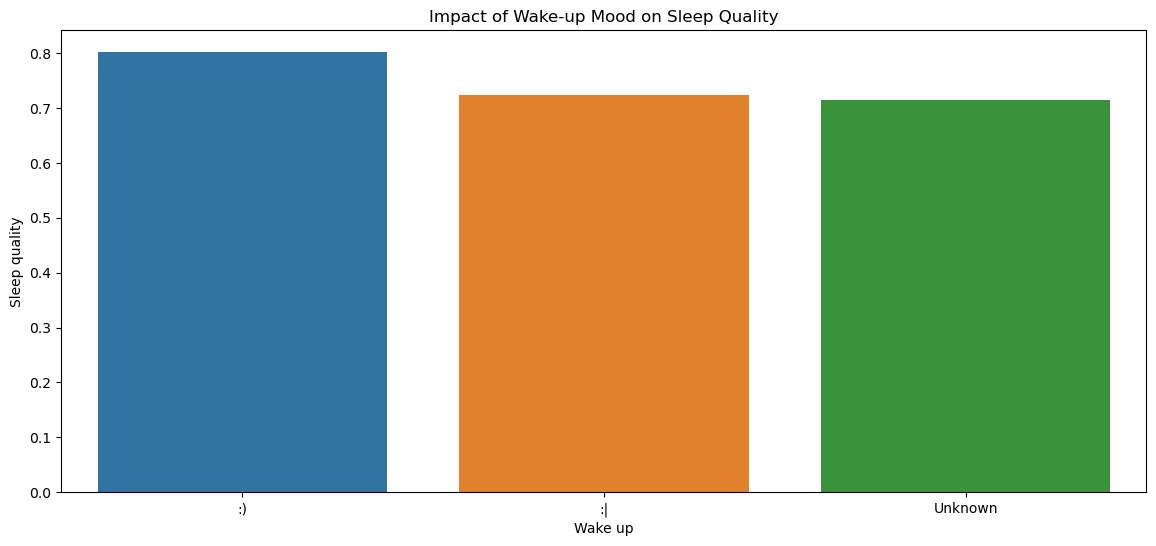

In [51]:
import seaborn as sns

# Remove rows with all missing values
sleep_data.dropna(how='all', inplace=True)

# Remove duplicate rows
sleep_data.drop_duplicates(inplace=True)

# Convert 'Start' and 'End' columns to datetime
sleep_data['Start'] = pd.to_datetime(sleep_data['Start'], errors='coerce')
sleep_data['End'] = pd.to_datetime(sleep_data['End'], errors='coerce')

# Remove rows with missing 'Start' or 'End' values
sleep_data.dropna(subset=['Start', 'End'], inplace=True)

# Convert 'Sleep quality' percentage strings to float values
sleep_data['Sleep quality'] = sleep_data['Sleep quality'].str.rstrip('%').astype(float) / 100.0

# Calculate the duration of sleep in hours
sleep_data['Duration'] = (sleep_data['End'] - sleep_data['Start']).dt.total_seconds() / 3600.0

# Check column names
print(sleep_data.columns)

# Grouping by 'Wake up' mood and calculating average sleep quality and duration
wake_up_impact = sleep_data.groupby('Wake up')[['Sleep quality', 'Duration']].mean().reset_index()

# Check the grouped data
print(wake_up_impact)

# Bar plot of wake up mood impact
plt.figure(figsize=(14, 6))
sns.barplot(data=wake_up_impact, x='Wake up', y='Sleep quality')
plt.title('Impact of Wake-up Mood on Sleep Quality')
plt.show()

## 5. Visualization

Finally, I will create various visualizations such as histograms to gain a better understanding of the dataset. This will include visualizing distributions and relationships between variables.

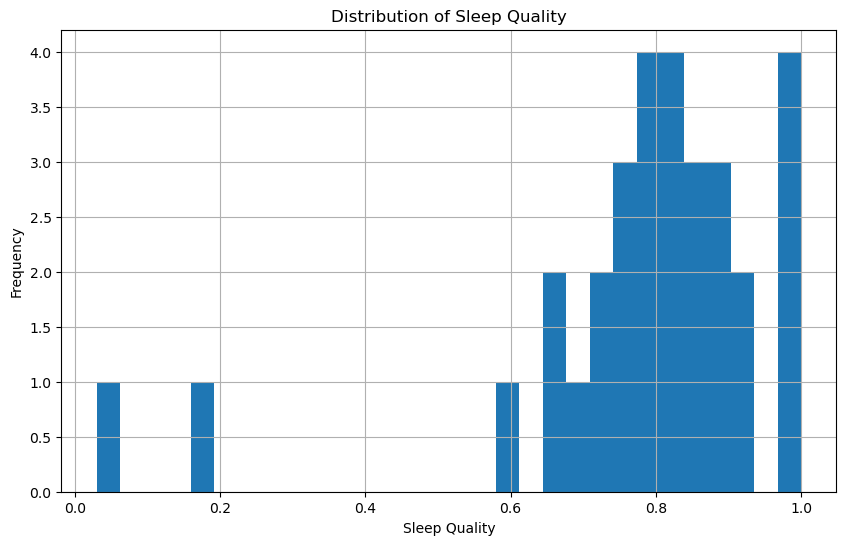

In [53]:
# Histogram of sleep quality
plt.figure(figsize=(10, 6))
sleep_data['Sleep quality'].hist(bins=30)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()